# Daily Power Generation in India 

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('data.csv')

## Understanding the data and EDA

In [3]:
# five elements from top
data.head()

,index,Date,Region,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU)
0,0,2017-09-01,Northern,624.23,484.21,30.36,35.57,273.27,320.81
1,1,2017-09-01,Western,"1,106.89","1,024.33",25.17,3.81,72.00,21.53
2,2,2017-09-01,Southern,576.66,578.55,62.73,49.80,111.57,64.78
3,3,2017-09-01,Eastern,441.02,429.39,NaN,NaN,85.94,69.36
4,4,2017-09-01,NorthEastern,29.11,15.91,NaN,NaN,24.64,21.21


In [4]:
# five elements from the end
data.tail()

,index,Date,Region,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU)
4940,305,2020-08-01,Northern,669.47,602.96,26.88,23.41,348.72,351.98
4941,306,2020-08-01,Western,"1,116.00","1,262.10",42.37,36.63,54.67,20.28
4942,307,2020-08-01,Southern,494.66,415.53,61.83,26.28,93.49,77.25
4943,308,2020-08-01,Eastern,482.86,547.03,NaN,NaN,87.22,93.78
4944,309,2020-08-01,NorthEastern,34.42,32.81,NaN,NaN,29.87,29.96


In [5]:
# coluns in the dataframe
data.columns

Index(['index', 'Date', 'Region', 'Thermal Generation Actual (in MU)',
       'Thermal Generation Estimated (in MU)',
       'Nuclear Generation Actual (in MU)',
       'Nuclear Generation Estimated (in MU)',
       'Hydro Generation Actual (in MU)',
       'Hydro Generation Estimated (in MU)'],
      dtype='object')

In [6]:
#description of data
data.describe()

,index,Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU)
count,4945.000000,2967.000000,2967.000000,4945.000000,4945.000000
mean,2181.433771,37.242208,36.987877,73.305921,76.842965
std,1397.754755,15.883968,11.491292,74.482145,82.043952
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,926.000000,26.140000,30.190000,26.910000,23.310000
50%,2162.000000,30.720000,34.840000,52.960000,50.270000
75%,3398.000000,46.830000,43.075000,85.940000,95.800000
max,4634.000000,68.740000,76.640000,348.720000,397.380000


In [7]:
# information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   index                                 4945 non-null   int64  
 1   Date                                  4945 non-null   object 
 2   Region                                4945 non-null   object 
 3   Thermal Generation Actual (in MU)     4945 non-null   object 
 4   Thermal Generation Estimated (in MU)  4945 non-null   object 
 5   Nuclear Generation Actual (in MU)     2967 non-null   float64
 6   Nuclear Generation Estimated (in MU)  2967 non-null   float64
 7   Hydro Generation Actual (in MU)       4945 non-null   float64
 8   Hydro Generation Estimated (in MU)    4945 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 347.8+ KB


### Visualisation

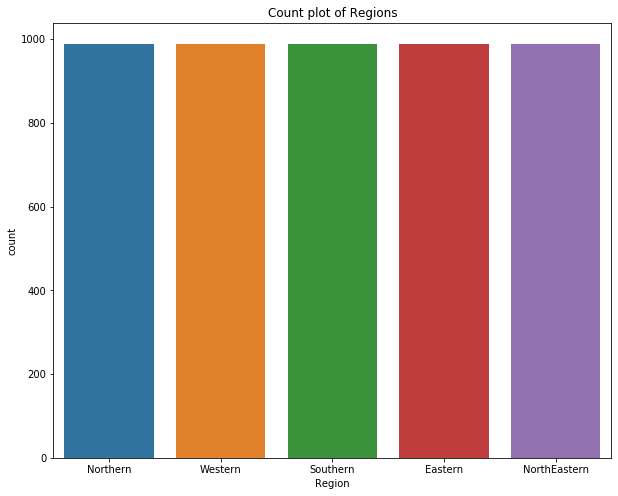

In [8]:
plt.figure(figsize=(10,8))
sns.countplot(data['Region'])
plt.title('Count plot of Regions')
plt.show()

**The dataset is balanced, as there is equal number of data points for every Region.**

### Handling missing values

In [9]:
data=data.drop('index',axis=1)
data.shape

(4945, 8)

In [10]:
# count of null values in the data
data.isna().sum()

Date                                       0
Region                                     0
Thermal Generation Actual (in MU)          0
Thermal Generation Estimated (in MU)       0
Nuclear Generation Actual (in MU)       1978
Nuclear Generation Estimated (in MU)    1978
Hydro Generation Actual (in MU)            0
Hydro Generation Estimated (in MU)         0
dtype: int64

In [11]:
# percentage of missing values in the data
data.isna().mean()

Date                                    0.0
Region                                  0.0
Thermal Generation Actual (in MU)       0.0
Thermal Generation Estimated (in MU)    0.0
Nuclear Generation Actual (in MU)       0.4
Nuclear Generation Estimated (in MU)    0.4
Hydro Generation Actual (in MU)         0.0
Hydro Generation Estimated (in MU)      0.0
dtype: float64

**About 40% of the data is missing in Nuclear Generation Actual and Estimated**

In [12]:
# filling the missing values
for col in ['Nuclear Generation Actual (in MU)','Nuclear Generation Estimated (in MU)']:
    data[col]=data[col].fillna(data[col].mean())

In [13]:
# count of null values in the data
data.isna().sum()

Date                                    0
Region                                  0
Thermal Generation Actual (in MU)       0
Thermal Generation Estimated (in MU)    0
Nuclear Generation Actual (in MU)       0
Nuclear Generation Estimated (in MU)    0
Hydro Generation Actual (in MU)         0
Hydro Generation Estimated (in MU)      0
dtype: int64

### Creating Month and Year Column

In [14]:
data['year']=data['Date'].apply(lambda x: re.search('^[^-]*',x).group(0))

In [15]:
# five elements from the top
data.head()

,Date,Region,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU),year
0,2017-09-01,Northern,624.23,484.21,30.360000,35.570000,273.27,320.81,2017
1,2017-09-01,Western,"1,106.89","1,024.33",25.170000,3.810000,72.00,21.53,2017
2,2017-09-01,Southern,576.66,578.55,62.730000,49.800000,111.57,64.78,2017
3,2017-09-01,Eastern,441.02,429.39,37.242208,36.987877,85.94,69.36,2017
4,2017-09-01,NorthEastern,29.11,15.91,37.242208,36.987877,24.64,21.21,2017


In [16]:
for col in ['Thermal Generation Actual (in MU)','Thermal Generation Estimated (in MU)']:
    data[col]=data[col].apply(lambda x:x.replace(',',''))

In [17]:
data.head()

,Date,Region,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU),year
0,2017-09-01,Northern,624.23,484.21,30.360000,35.570000,273.27,320.81,2017
1,2017-09-01,Western,1106.89,1024.33,25.170000,3.810000,72.00,21.53,2017
2,2017-09-01,Southern,576.66,578.55,62.730000,49.800000,111.57,64.78,2017
3,2017-09-01,Eastern,441.02,429.39,37.242208,36.987877,85.94,69.36,2017
4,2017-09-01,NorthEastern,29.11,15.91,37.242208,36.987877,24.64,21.21,2017


In [18]:
y=data['Region']
x=data.drop(['Region','Date'],axis=1)

In [19]:
x=x.astype(np.float)
x.head()

,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU),year
0,624.23,484.21,30.360000,35.570000,273.27,320.81,2017.0
1,1106.89,1024.33,25.170000,3.810000,72.00,21.53,2017.0
2,576.66,578.55,62.730000,49.800000,111.57,64.78,2017.0
3,441.02,429.39,37.242208,36.987877,85.94,69.36,2017.0
4,29.11,15.91,37.242208,36.987877,24.64,21.21,2017.0


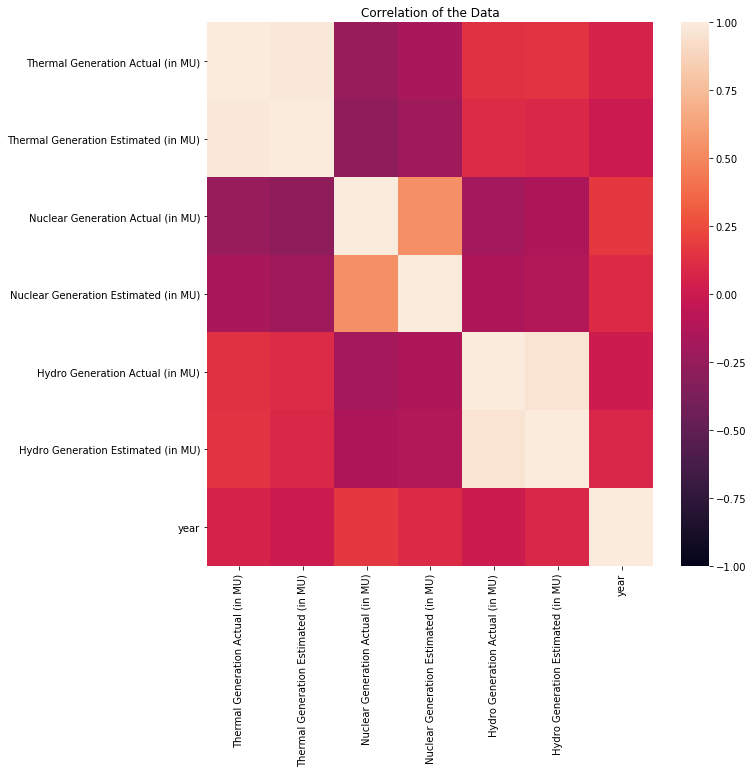

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(x.corr(),vmin=-1,vmax=1)
plt.title('Correlation of the Data')
plt.show()

In [21]:
for col in list(x.columns):
    n=len(pd.unique(x[col]))
    print("Number of unique elements in the column: ",col," is:   ",n)

Number of unique elements in the column:  Thermal Generation Actual (in MU)  is:    1388
Number of unique elements in the column:  Thermal Generation Estimated (in MU)  is:    4543
Number of unique elements in the column:  Nuclear Generation Actual (in MU)  is:    90
Number of unique elements in the column:  Nuclear Generation Estimated (in MU)  is:    1693
Number of unique elements in the column:  Hydro Generation Actual (in MU)  is:    172
Number of unique elements in the column:  Hydro Generation Estimated (in MU)  is:    4117
Number of unique elements in the column:  year  is:    4


In [22]:
x['year'].value_counts()

2019.0    1825
2018.0    1820
2020.0     695
2017.0     605
Name: year, dtype: int64

In [23]:
x=pd.get_dummies(x,columns=['year'])

In [24]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
col=['Thermal Generation Actual (in MU)','Thermal Generation Estimated (in MU)','Nuclear Generation Actual (in MU)','Nuclear Generation Estimated (in MU)','Hydro Generation Actual (in MU)','Hydro Generation Estimated (in MU)']
x[col]=sc.fit_transform(x[col])

In [25]:
x.head()

,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU),year_2017.0,year_2018.0,year_2019.0,year_2020.0
0,0.052808,-0.237865,-5.594565e-01,-1.593189e-01,2.684997,2.973915,1,0,0,0
1,1.311389,1.171088,-9.813530e-01,-3.728012e+00,-0.017535,-0.674255,1,0,0,0
2,-0.071235,0.008230,2.071910e+00,1.439627e+00,0.513787,-0.147045,1,0,0,0
3,-0.424929,-0.380868,2.945771e-14,-1.596794e-15,0.169643,-0.091216,1,0,0,0
4,-1.499023,-1.459469,2.945771e-14,-1.596794e-15,-0.653457,-0.678156,1,0,0,0


In [26]:
from sklearn.model_selection import train_test_split as tts,GridSearchCV
xtrain,xtest,ytrain,ytest=tts(x,y,test_size=0.2,random_state=42)
print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

(3956, 10) (3956,)
(989, 10) (989,)


### Model Making

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
param={'C':[0.001,0.01,0.1,1,10,100]}
m1=GridSearchCV(LogisticRegression(max_iter=500),param,n_jobs=-1)
m1.fit(xtrain,ytrain)
print("Best parameter for the model is: ",m1.best_params_)

ypred=m1.predict(xtest)
print("The accuracy of the model is: ",accuracy_score(ytest,ypred)*100," %")
print("The confusion matrix is: \n",confusion_matrix(ytest,ypred))

Best parameter for the model is:  {'C': 100}
The accuracy of the model is:  99.89888776541962  %
The confusion matrix is: 
 [[191   0   0   0   0]
 [  0 213   0   0   0]
 [  0   0 203   0   0]
 [  0   0   0 194   0]
 [  0   0   1   0 187]]


In [28]:
from sklearn.neural_network import MLPClassifier
m2=MLPClassifier(hidden_layer_sizes=(64,64))
m2.fit(xtrain,ytrain)
ypred=m2.predict(xtest)
print("The accuracy of the model is: ",accuracy_score(ytest,ypred)*100," %")
print("The confusion matrix is: \n",confusion_matrix(ytest,ypred))

The accuracy of the model is:  99.89888776541962  %
The confusion matrix is: 
 [[191   0   0   0   0]
 [  0 213   0   0   0]
 [  0   0 203   0   0]
 [  0   0   0 194   0]
 [  0   0   1   0 187]]
